In [1]:
import pickle
import yaml
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import optuna

from sklearn.linear_model import LinearRegression

In [2]:
with open('config.yaml','r') as file_object:
    config = yaml.load(file_object,Loader=yaml.SafeLoader)

In [3]:
d = 'pv'
models = ['fnn', 'cnn', 'tcn', 'lstm', 'bilstm']

study_names = [d + '_' + m for m in models]
storages = ['sqlite:///'+'studies/'+study+'.db' for study in study_names]

In [4]:
studies = [optuna.load_study(study_name=study, storage=storage) for study, storage in zip(study_names, storages)]

### Best Trial

In [5]:
for model, study in enumerate(studies):
    print('Best trial of', models[model])
    trial = study.best_trial

    print(f'  MAE: {trial.value}')
    print('  Params: ')
    for key, value in trial.params.items():
        print(f'    {key}: {value}')
    print()

Best trial of fnn
  MAE: 0.03334477295478185
  Params: 
    batch_size: 86
    local_epochs: 4
    n_rounds: 10
    n_layers: 2
    lr: 1.3631243908726753e-05
    units: 87

Best trial of cnn
  MAE: 0.033568259328603745
  Params: 
    batch_size: 82
    local_epochs: 9
    n_rounds: 7
    n_layers: 2
    lr: 1.4640442914791005e-05
    filters: 59
    kernel_size: 5

Best trial of tcn
  MAE: 0.03413150956233343
  Params: 
    batch_size: 248
    local_epochs: 3
    n_rounds: 7
    n_layers: 2
    lr: 0.00029390580576208695
    filters: 32
    kernel_size: 2

Best trial of lstm
  MAE: 0.038002715756495796
  Params: 
    batch_size: 105
    local_epochs: 33
    n_rounds: 5
    n_layers: 1
    lr: 4.097459051283279e-05
    units: 93

Best trial of bilstm
  MAE: 0.03594161383807659
  Params: 
    batch_size: 130
    local_epochs: 38
    n_rounds: 9
    n_layers: 2
    lr: 0.05508574685136758
    units: 115



In [7]:
def ten_best(study):
    trials = [trial for trial in study.trials if trial.value is not None]
    sorted_trials = sorted(trials, key=lambda x: x.value)
    print("Top 10 Trials:", '\n')
    for trial in sorted_trials[:10]:
        print(f"Trial {trial.number}: MAE = {trial.value}")
        print(f"  Params: {trial.params}")
        print()

HPO Progess of model: fnn
Improvement per Trial: 1.0592320232792562e-05


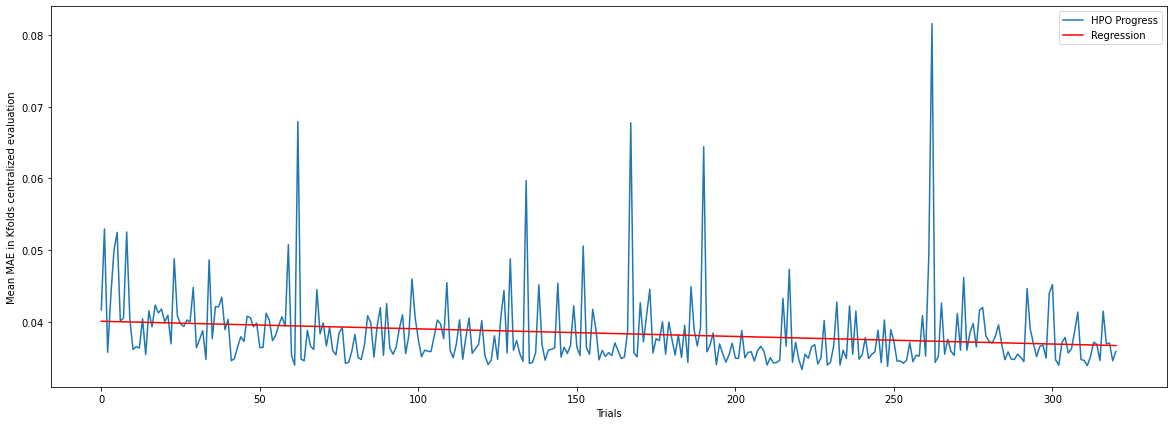

HPO Progess of model: cnn
Improvement per Trial: 8.561765328894412e-06


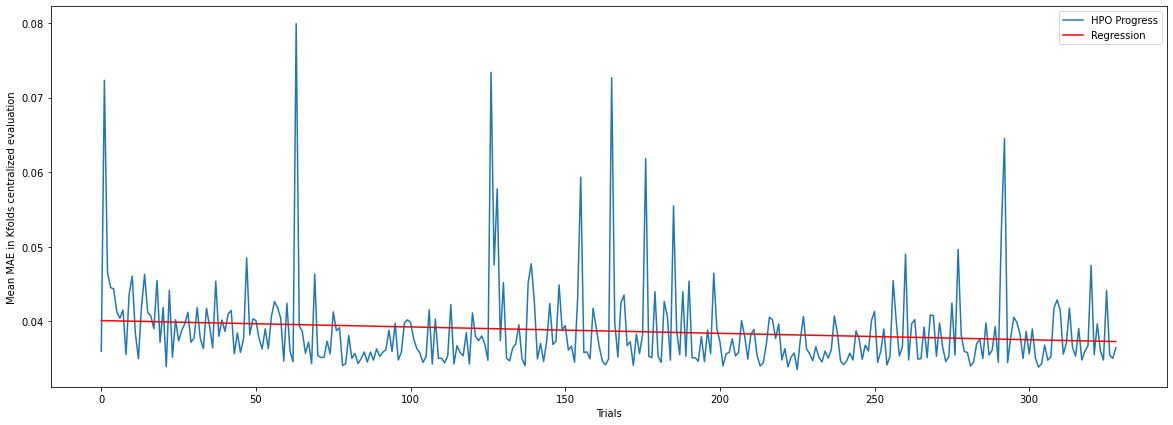

HPO Progess of model: tcn
Improvement per Trial: 1.8872706512524118e-05


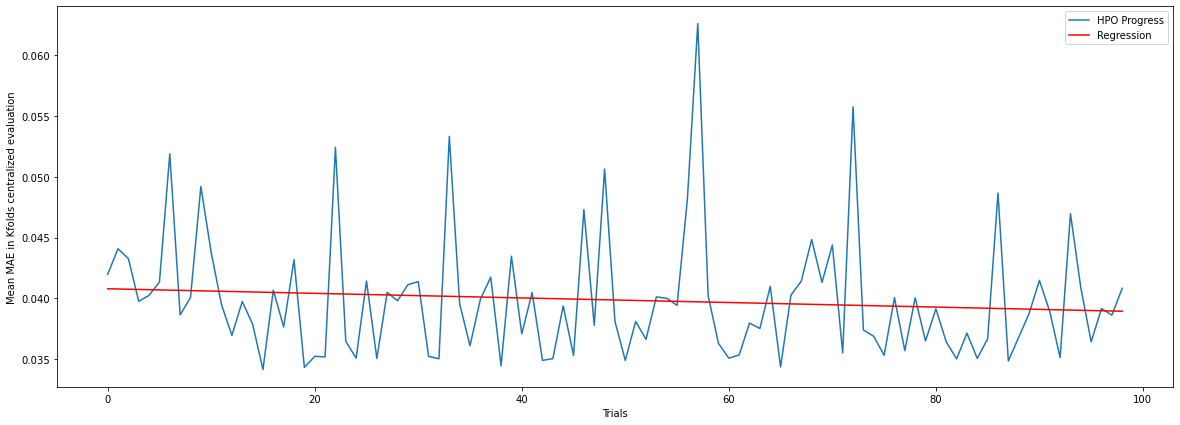

HPO Progess of model: lstm
Improvement per Trial: 5.700701100826078e-05


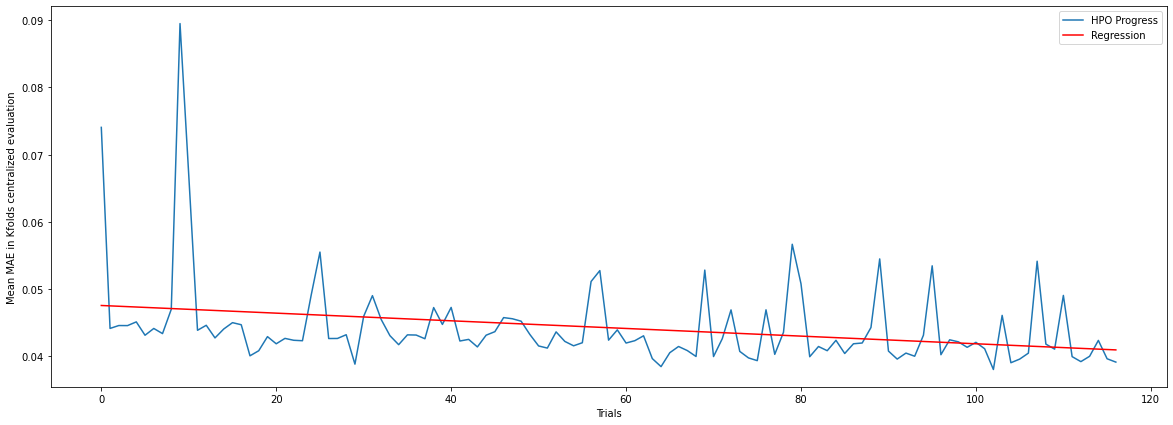

HPO Progess of model: bilstm
Improvement per Trial: 2.8853995611912063e-05


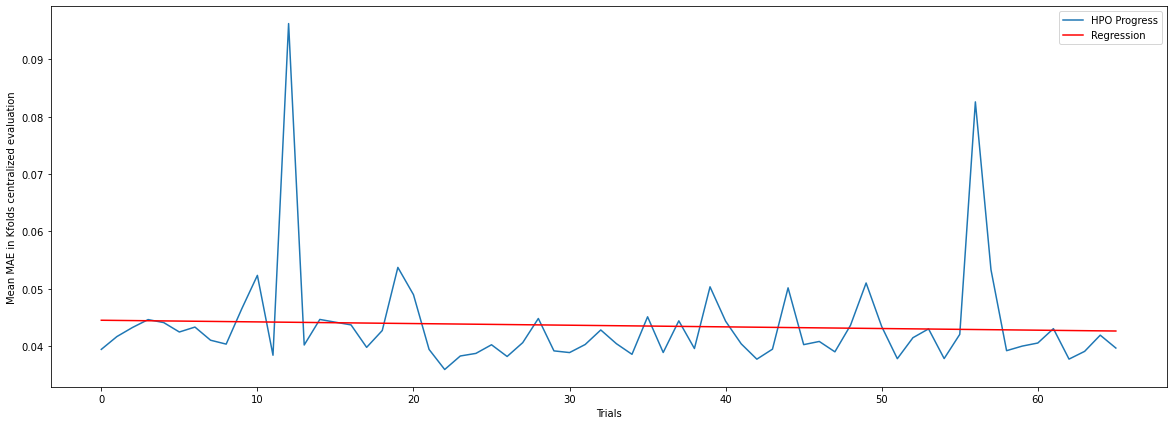

In [8]:
for model, study in enumerate(studies):
    print('HPO Progess of model:', models[model])
    trials = [trial for trial in study.trials if trial.value is not None]
    sorted_trials = sorted(trials, key=lambda x: x.value)

    sorted_by_number = sorted(trials, key=lambda x: x.number)

    progress = [trial.values for trial in sorted_by_number]

    x = np.arange(len(progress)).reshape(-1, 1)

    lr = LinearRegression()
    lr.fit(x, progress)

    y_pred = lr.predict(x)

    plt.figure(figsize=(20,7))

    print('Improvement per Trial:', lr.coef_[0][0]*-1)

    plt.plot(progress, label='HPO Progress')
    plt.plot(y_pred, 'r-', label='Regression')
    plt.xlabel('Trials')
    plt.ylabel('Mean MAE in Kfolds centralized evaluation')
    plt.legend()
    plt.show()